# Chapter 9 :  Combining Pandas Objects

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Recipes
* [9.1 Appending new rows to DataFrames](#9.1-Appending-new-rows-to-DataFrames)
* [9.2 Concatenating multiple DataFrames together](#9.2-Concatenating-multiple-DataFrames-together)
* [9.3 Comparing President Trump's and Obama's approval rating](#9.3-Comparing-President-Trump's-and-Obama's-approval-rating)
* [9.4 Replicating concat with merge and join](#9.4-Replicating-concat-with-merge-and-join)
* [9.5 Connecting to SQL Databases](#9.5-Connecting-to-SQL-Databases)


# 9.1 Appending new rows to DataFrames

In [2]:
### [Tech] 행추가.  1.loc 인덱서   2. append()
### [Goal] names table에 행 추가를 예시 해본다. 
### [Data] names.csv,  baseball16.csv

## >> How to do it...

In [3]:
# 9.1.1 names.csv에서 names를 load 한다. 2개 컬럼 4개 행이 있다.  
names = pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [4]:
# 9.1.2   .loc[4] 를 이용해서 새로운 행을 추가한다. 
#        행 추가시에는 .iloc는 작동하지 않는다. 
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [5]:
# 9.1.3 .loc 는 레이블 인덱스를 제어한다.  정수가 아닌 값을 추가해도 된다. 
names.loc['five'] =\
          ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [6]:
# 9.1.4 신규 값을 리스트 대신, 사전으로 할당한다 (명확해진다)
#       인덱스 레이블은 삽입될 위치 번호 (현 names 의 길이)로 한다. 
names.loc[len(names)] = \
   {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [7]:
# 9.1.5 Series로 전달 할 수 도 있다. 사전과 동일하게 작동한다. 
#       Series를 전체(transpose) 해서 insert 하게 된다. 
names.loc[len(names)] =\
  pd.Series({'Age':32, 
             'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [8]:
# 9.1.6 .loc 연산을 사용하면, 해당 DataFrame에 직접 바로 반영된다. 
#       .append를 사용하면 자기자신에게 바로 반영되지는 않는다. 


# Use append with fresh copy of names
names = pd.read_csv('data/names.csv')
names.append({'Name':'Aria', 'Age':1})

# 오류가 발생하는 원인은 인덱스 레이블이 정의 되지 않기 때문이다. 
#  Dictionary 를 넘겼음에도 Series message가 나오는 것은 메시지 오류이다. 

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [9]:
# 9.1.7 인덱스를 무시하는 패러미터를 작동 하면 ignore_index = True 를 설정하면
#      기존의 인덱스가 모두 없어진다. 
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [10]:
names.index

RangeIndex(start=0, stop=4, step=1)

In [11]:
# 9.1.8 인덱스 유지여부 실험을 위해서 인덱스 레이블을 부여해 본다 
names.index = ['Canada', 'Canada', 'USA', 'USA']
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [12]:
names.index

Index(['Canada', 'Canada', 'USA', 'USA'], dtype='object')

In [13]:
# 9.1.9 append( data, ignore_index = True)를 시도하면 기존 인덱스 레이블은 없어진다. 
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [14]:
# append 는 names 객체를 변경하지는 않는다. 
names.index

Index(['Canada', 'Canada', 'USA', 'USA'], dtype='object')

In [15]:
# 9.1.10  Sereis 추가 시에 Series 의 이름 name 이 있으면 이름을 인덱스 레이블로 추가가 된다. 
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s

Name    Zach
Age        3
Name: 4, dtype: object

In [16]:
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


In [17]:
# 9.1.11  이름이 있는 Series 2개를 동시에 append 한다. 
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names.append([s1, s2])

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3
USA,Zayd,2


In [18]:
# 9.1.12 컬럼수가 많은 경우에는 사전의 키값을 오류 없이 입력하는 것도 번거로운 일이다. 
#        이럴 때는 사전 템플릿dictioinary template을  만들어 사용하면 좋다.  
#        예시를 위해 컬럼이 많은 경우를 살펴보자
#        baseball16.csv 를 bball_16에 load 한다. 
bball_16 = pd.read_csv('data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [19]:
# 9.1.13 bball_16의 한 줄을 읽고 해당 줄을 dictionary로 변환한다. 
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [20]:
# 9.1.14  사전의 모든 값에 대해서 문자열은 '' 나머지는  np.nan으로 변경한다. 
new_data_dict = {k: '' if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_data_dict)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


## >> There's more... 9.1

In [21]:
# pandas DataFrame에 한 줄씩 행을 추가하는 것은 비효율 적인 방식이다. 
#  사전dictionary를 이용해 DataFrame을 만들 때,  컬럼 방향으로 쌓는 것을 기억하자.

# 시간 비교를 위해, 임의의 데이터 100개 Series를 생성해서 리스트 random_data에 담아둔다. 

random_data = []
for i in range(100):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d, name=i + len(bball_16)))
    
random_data[0].head()

playerID    b
yearID      9
stint       4
teamID      b
lgID        c
Name: 16, dtype: object

In [22]:
#  한 줄씩 loop를 이용해서 append 하는 경우

In [23]:
%%timeit
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = bball_16_copy.append(row)

1.38 s ± 88.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
# 한 번에 random_data를 append 하는 경우

In [25]:
%%timeit
bball_16_copy2 = bball_16.copy()
bball_16_copy2 = bball_16_copy2.append(random_data)

21.8 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 9.2 Concatenating multiple DataFrames together

In [26]:
### [Tech] concat은 aixs 로 지정한 방향으로 연결해서 저장한다.
### [Goal] 컬럼 인덱스가  같고 행 인덱스가 다른 2개년도의 주식 테이블을 연결해본다. 
### [Data] stocks_2016.csv, stocks_2017.csv

## >> How to do it...

In [27]:
# 9.2.1 stocks_2016, stocks_2017을 각각 csv로 부터 읽어들이고, 
#       기업코드'Symbol'을 인덱스로 지정한다. 
#    'AAPL','TSLA'는 겹치고 그 외 데이터는 한 쪽 테이블에만 나타난다. 
stocks_2016 = pd.read_csv('data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv', index_col='Symbol')

In [28]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [29]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [30]:
# 9.2.2  2개의 테이블을 .concat()을 이용해 수직으로 연결한다. 
#       .concat(테이블 목록,  axis = 0)
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [31]:
# 9.2.3 .concat () 에 패러미터로 keys, names를 부여 할 수 있다. 
#      keys 각 테이블 식별,   names = 인덱스 이름
pd.concat(s_list, keys=['2016', '2017'], names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [32]:
# 9.2.4  수평으로 연결하기 위해서는 axis = 'columns' 로 축의 방향을 지정한다. 
#        한 쪽에만 있는 경우, NaN으로 표기 된다. 
pd.concat(s_list, keys=['2016', '2017'], axis='columns', names=['Year', None],
         sort = True)

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN

In [33]:
# 9.2.5 교집합만 연계 하기 위해서는 join = 'inner'  패러미터를 지정한다. 
pd.concat(s_list, join='inner', keys=['2016', '2017'],\
          axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## >> There's more... 9.2

In [34]:
# .append() 함수는 내부적으로 .concat()함수를 호출한다. 
#  아래 코드는 9.2.2 와 동일 한 결과를 반환한다. 
#  s_list = [stocks_2016, stocks_2017]
#  pd.concat(s_list)
stocks_2016.append(stocks_2017)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


# 9.3 Comparing President Trump's and Obama's approval rating

In [35]:
### [Tech] pd.concat 을 사용해서 데이터를 합치고, groupby, pivot을 사용해 자료를 가공한다.
### [Goal] 미국 41~45대 대통력의 지지율 추이를 그래프로 비교 표현해 본다. 
### [Data] 산타바바라 캘리포니아 대학 미 대통령직 프로젝트에서 국정수행능력 평가점수를 
###        수집하여 google doc으로 공개하고 있다. (지지율)
###        
###    pandas cookbook 출판 시점과 달리 제공사이트가 개편되어,  접근 방식을 달리한다. 
###    https://www.presidency.ucsb.edu/statistics/data/presidential-job-approval

## >> How to do it...

In [36]:
# 9.3.1  미대통령 수행평가 페이지에 접속해본다.
# https://www.presidency.ucsb.edu/statistics/data/presidential-job-approval
# 9.3.2~ 9.3.12 : 출판 당시와 현 시점이 다른 구성으로 생략


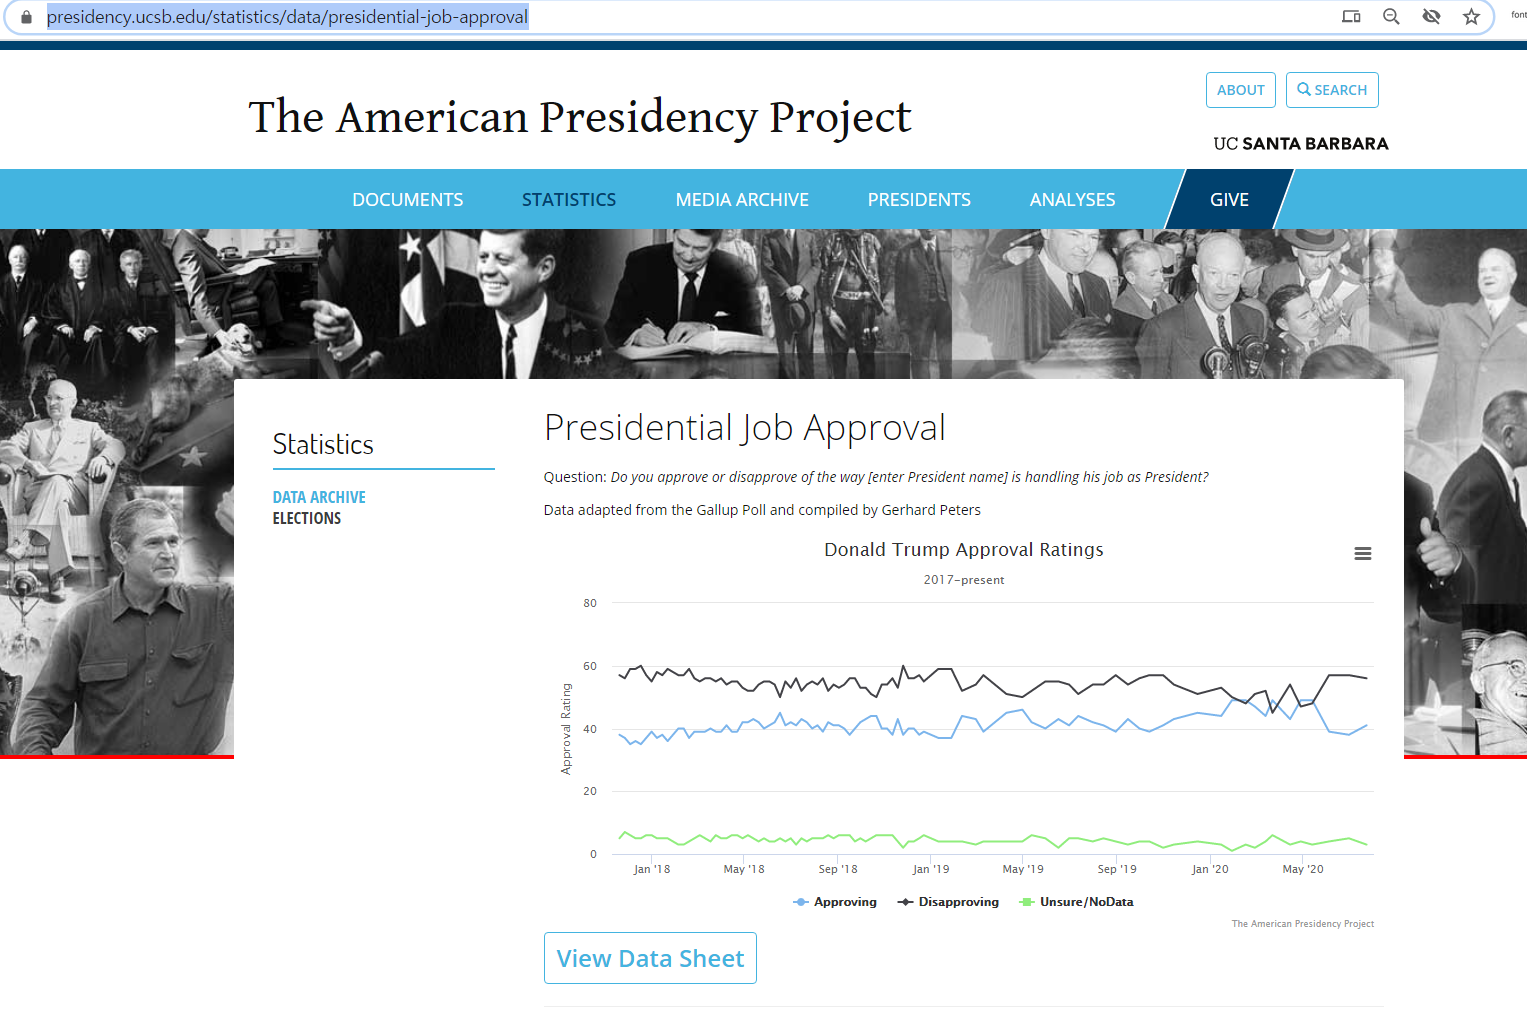

In [37]:
# View Data Sheet를 클릭하거나, 아래 링크로 연결하여 데이터를 엑셀 파일을 다운 받을 수 있다.

presient_eval_url = 'https://docs.google.com/spreadsheets/d/'\
             '1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/'\
             'edit?ts=5bd7f609#gid=671375968'
presient_eval_url



'https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?ts=5bd7f609#gid=671375968'

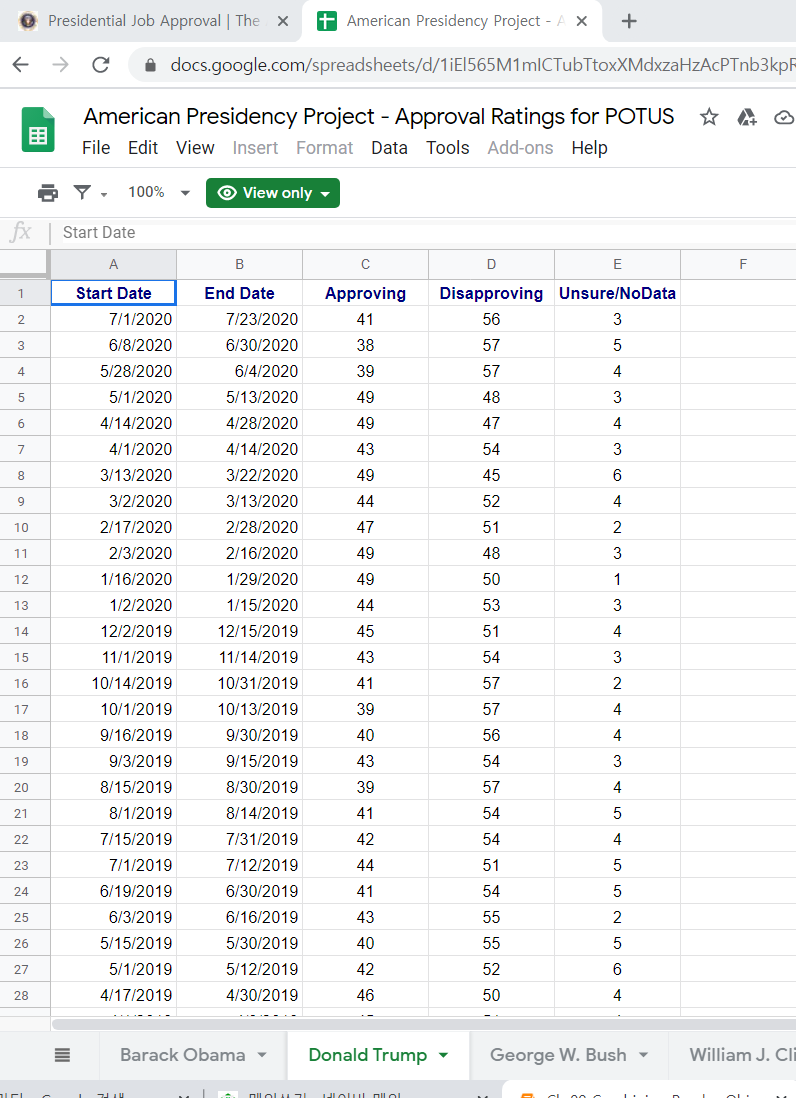

In [38]:
# download 하여 기 배포한 excel 활용
# "American Presidency Project - Approval Ratings for POTUS 20Jul.xlsx"

In [39]:
# 9.3.13
# google doc에서 저장 받은 파일 (2020/08/04)
filename = "American Presidency Project - Approval Ratings for POTUS 20Jul.xlsx"
#filename2 = "American Presidency Project - Approval Ratings for POTUS 20May.xlsx"


# 주어진 대통령 이름의 시트를 읽고,  첫 번째 컬럼에 대통령 이름을 담은 데이터 프레임 반환
def get_pres_appr (pres_name):
    df = pd.read_excel('data/'+filename, sheet_name = pres_name)
    df.insert(0, 'President', pres_name)
    return df 

In [40]:
# 9.3.14 Obama 대통령을 읽어 들여본다
obama = get_pres_appr('Barack Obama')
display (obama.head())
obama.shape

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Barack Obama,2017-01-16,2017-01-19,59,37,4
1,Barack Obama,2017-01-09,2017-01-15,57,39,4
2,Barack Obama,2017-01-02,2017-01-08,55,42,3
3,Barack Obama,2016-12-26,2017-01-01,55,40,5
4,Barack Obama,2016-12-19,2016-12-25,56,40,4


(418, 6)

In [41]:
# 9.3.15  41대 부터 45대 대통령의 데이터를 하나의 데이터프레임으로 읽어 들여본다.

# 41대 부터 45대 대통령까지 이름
pres_names = ['George Bush', 
              'William J. Clinton',
              'George W. Bush',
              'Barack Obama',
              'Donald Trump',]

# get_pres_appr로 대통령별 시트를 읽어 들이면서 pd.concat으로 하나의 파일로 합한다.
pres_41_45 = pd.concat([get_pres_appr (x) for x in pres_names],
                      ignore_index = True)
pres_41_45.sort_values('Start Date', inplace = True)
pres_41_45.reset_index (inplace = True, drop = True)

# 각 대통령 별 첫 3행 출력
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,George Bush,1989-01-24,1989-01-26,51,6,43
1,George Bush,1989-02-24,1989-02-27,60,11,27
2,George Bush,1989-02-28,1989-03-02,62,13,24
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15
386,George W. Bush,2001-02-01,2001-02-04,57,25,18
387,George W. Bush,2001-02-09,2001-02-11,57,24,17
388,George W. Bush,2001-02-19,2001-02-21,61,21,16
656,Barack Obama,2009-01-19,2009-01-25,67,13,20


In [42]:
# 9.3.16 날자 중복 여부의 확인
pres_41_45['End Date'].value_counts().head(8)

1990-03-11    2
1990-05-22    2
1999-02-09    2
1992-11-22    2
1990-08-12    2
1990-08-26    2
2017-10-15    1
2014-09-14    1
Name: End Date, dtype: int64

In [43]:
# 9.3.17 중복된 데이터의 내용물을 확인하고 정리한다. 
dup_index = pres_41_45['End Date'].value_counts().index[:6]
dup_index
pres_41_45.loc[pres_41_45['End Date'].isin(dup_index)]

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
30,George Bush,1990-02-09,1990-03-11,72,15,11
32,George Bush,1990-03-08,1990-03-11,68,18,13
36,George Bush,1990-05-04,1990-05-22,67,19,13
37,George Bush,1990-05-04,1990-05-22,65,20,13
43,George Bush,1990-07-20,1990-08-12,61,26,12
44,George Bush,1990-08-09,1990-08-12,74,15,10
46,George Bush,1990-08-10,1990-08-26,68,20,11
49,George Bush,1990-08-23,1990-08-26,75,16,7
153,George Bush,1992-11-20,1992-11-22,42,46,11
154,George Bush,1992-11-20,1992-11-22,42,46,11


In [44]:
# 분석의 편의를 위해 첫번째 값만 유지한다
pres_41_45 = pres_41_45.drop_duplicates(subset='End Date')

In [45]:
# 9.3.18 데이터의 요약통계량
pres_41_45.shape

(1201, 6)

In [46]:
pres_41_45['President'].value_counts()

Barack Obama          418
George W. Bush        270
William J. Clinton    227
George Bush           153
Donald Trump          133
Name: President, dtype: int64

In [47]:
pres_41_45.groupby('President', sort=False)\
         .median().round(1)

,Approving,Disapproving,Unsure/NoData
President,,,
George Bush,62.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barack Obama,47.0,46.0,7.0
Donald Trump,40.0,55.0,5.0


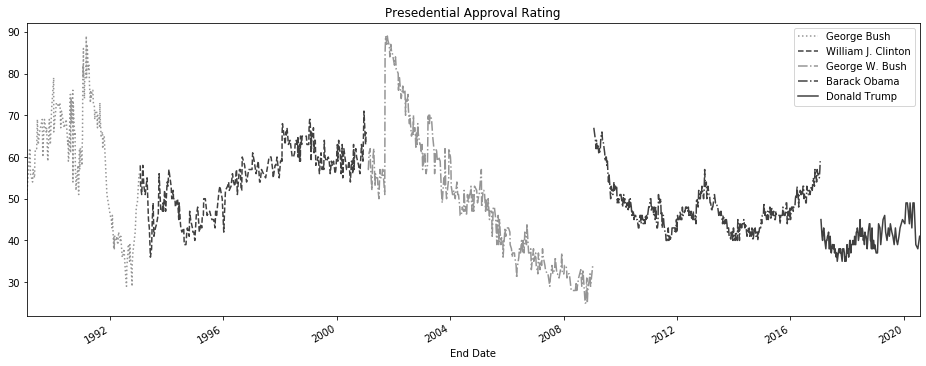

In [48]:
# 9.3.19
# 대통령 별로 구분된 groupby 객체를 활용하여 대통령마다 다른 style을 적용한 지지율 차트를 
# 그린다. 
from matplotlib import cm
fig, ax = plt.subplots(figsize=(16,6))

styles = [ ':', '--', '-.','-.' ,'-']
colors = [.5, .8, .5, .8, .8]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax=ax, label=pres, style=style,\
            color=cm.Greys(color), 
            title='Presedential Approval Rating')

In [49]:
# 9.3.20 각 대통령의 취임일자를 기준으로 비교할 수 있도록 재임일자 Days in Office를 추가한다.
day_func = lambda x: x - x.iloc[0]
pres_41_45['Days in Office'] = pres_41_45.groupby('President')['End Date']\
                                         .transform(day_func)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Days in Office
0,George Bush,1989-01-24,1989-01-26,51,6,43,0 days
1,George Bush,1989-02-24,1989-02-27,60,11,27,32 days
2,George Bush,1989-02-28,1989-03-02,62,13,24,35 days
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22,0 days
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16,5 days
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15,19 days
386,George W. Bush,2001-02-01,2001-02-04,57,25,18,0 days
387,George W. Bush,2001-02-09,2001-02-11,57,24,17,7 days
388,George W. Bush,2001-02-19,2001-02-21,61,21,16,17 days
656,Barack Obama,2009-01-19,2009-01-25,67,13,20,0 days


In [50]:
# 9.3.21  추가된 'Days in Office' 는 기간에 해당한다. 
pres_41_45.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
Unsure/NoData               int64
Days in Office    timedelta64[ns]
dtype: object

In [51]:
# 9.3.22 'Days in Office' 를 차트로 표현할 수 있도록 정수형으로 변환한다. 
pres_41_45['Days in Office'] = pres_41_45['Days in Office'].dt.days
pres_41_45['Days in Office'].head()

0     0
1    32
2    35
3    43
4    46
Name: Days in Office, dtype: int64

In [52]:
# 9.3.23  9.3.19에서 사용한 groupby  방식 대신에 pivot_tables를 이용하여
#        chart를 그려본다. 
pres_pivot = pres_41_45.pivot(index='Days in Office',\
                              columns='President', \
                              values='Approving')
pres_pivot.head()

President,Barack Obama,Donald Trump,George Bush,George W. Bush,William J. Clinton
Days in Office,,,,,
0,67.0,45.0,51.0,57.0,58.0
5,NaN,NaN,NaN,NaN,53.0
7,66.0,43.0,NaN,57.0,NaN
14,65.0,41.0,NaN,NaN,NaN
17,NaN,NaN,NaN,61.0,NaN


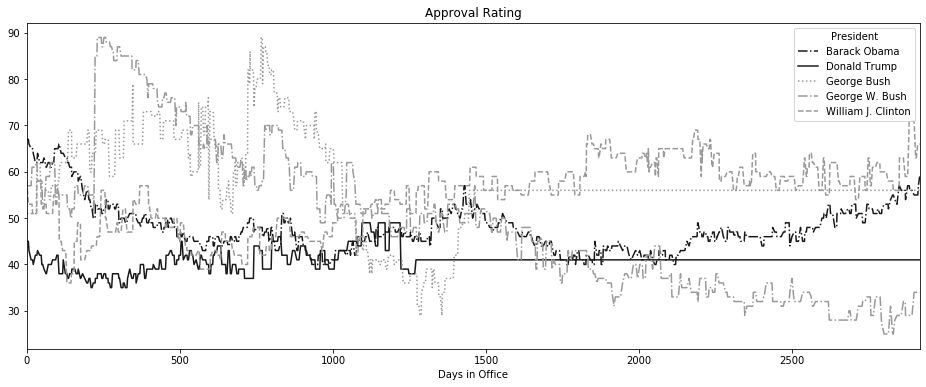

In [53]:
# 9.3.24 재임일자별 차트를 그린다. 
plot_kwargs = dict(figsize=(16,6),\
                   color=cm.gray([.1, .1, .6, .6, .6]),\
                   style=['-.', '-', ':', '-.', '--'],\
                   title='Approval Rating')
pres_pivot.loc[:, :]\
          .ffill().plot(**plot_kwargs)

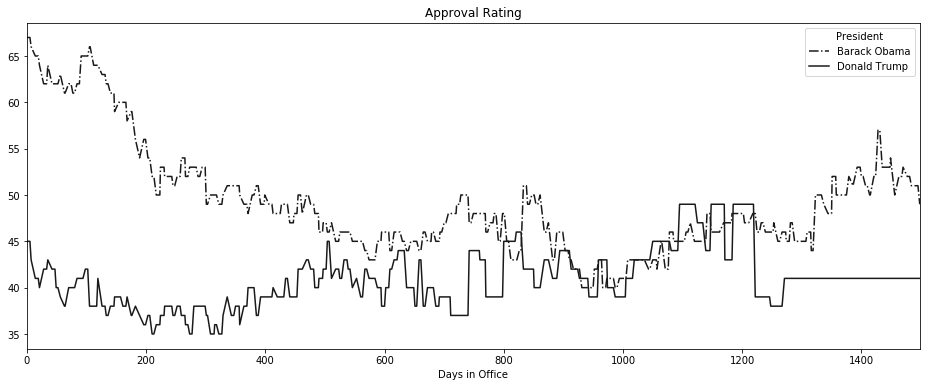

In [54]:
# Trump와 Obama의 1200일까지의 차트
pres_pivot.loc[:1500, pres_names[-2:]]\
          .ffill().plot(**plot_kwargs) ;

## >> There's more... 9.3

In [55]:
# 좀더 부드러운 그래프 표현을 위해 rolling 기법을 사용할 수 있다. 
pres_rm = pres_41_45.groupby('President', sort=False) \
                    .rolling('90D', on='End Date')['Approving'] \
                    .mean()
pres_rm.head()

President    End Date  
George Bush  1989-01-26    51.000000
             1989-02-27    55.500000
             1989-03-02    57.666667
             1989-03-10    58.750000
             1989-03-13    58.200000
Name: Approving, dtype: float64

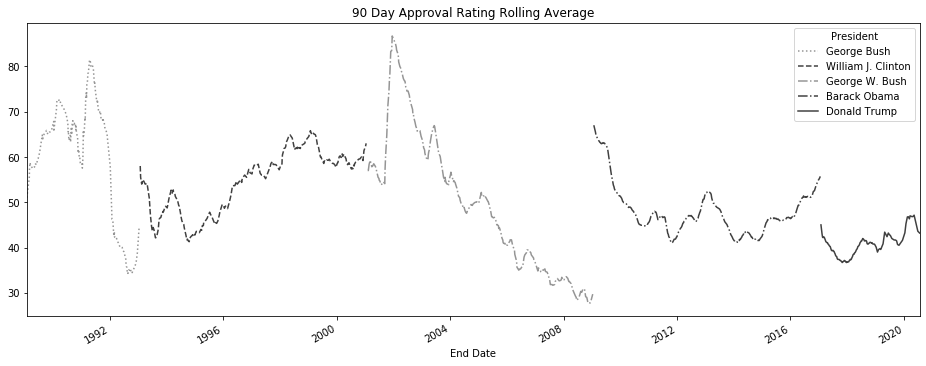

In [56]:
styles = [ ':', '--', '-.','-.' ,'-']
colors = [.5, .8, .5, .8, .8]
color = cm.Greys(colors)
title='90 Day Approval Rating Rolling Average'
plot_kwargs = dict(figsize=(16,6), style=styles, color = color, title=title)

pres_rm.unstack('President')[pres_names].plot(**plot_kwargs)

# 9.4 Replicating concat with merge and join

In [57]:
### [Tech]  수평방향으로 동작하는 merge, join 메소드를 살펴본다. 
###         concat은 복수개의 객체를 인덱스로 연결 - 기본값 outer join
###         join은 호출하는 DataFrame을 중심으로 나머지 복수개의 df을 인덱스로 연결
###                   - 기본값 left join
###         merge는 2개의 DataFrame을 컬럼 또는 인덱스로 연결 -  기본값  inner join 
### [Goal]  다양하게 분할 된 테이블을 하나의 테이블로 합한다.
### [Data]  stock_2016, _2017, _2018
###         food_prices, _transactions
###         gas prices by type

## >> How to do it...

In [58]:
# 9.4.1 3개 연도  주식테이블을 수평으로 배치하여 출력한다. 

# 2016~2018년 연도별 주식 테이블을 읽어들여 3개의 DataFrame을 갖는 리스트를 생성한다. 
# index로 기업코드명 Symbol을 지정한다. 

years = 2016, 2017, 2018
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year), index_col='Symbol') 
                for year in years]

# 수평으로 출력하기 위해서 html로 변환하는 IPython 라이브러리를 읽어 들이고 
# 함수를 정의 한다. 

from IPython.display import display_html
def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'  # table tag header
    # frame 내 df 마다 tag 변경
    tables_html = [df.to_html().replace('<table', t_style) for df in frames] 
    space = '&nbsp;' * num_spaces  # 여백
    display_html(space.join(tables_html),   # 문자열로서의 html 연결
                 raw=True)                  # html 출력

display_frames(stock_tables, 30)    # 3개 df를 30 간경으로 출력
stocks_2016, stocks_2017, stocks_2018 = stock_tables  # 각각의 df 이름 부여

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [59]:
type(stock_tables) , type (stock_tables[0])

(list, pandas.core.frame.DataFrame)

In [60]:
# 9.4.2 3개의 테이블을 concat() 함수를 이용 수직으로 연결 
pd.concat(stock_tables)   # default axis = 0

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [61]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])   # keys로 구분하여 연결 , 인덱스 계층화

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [62]:
# 9.4.3 concat() 함수로 수평으로 연결해본다.  
# 연도를 key, df을 value로 하는 dictionary를 정의한다. 
dict(zip(years,stock_tables))

{2016:         Shares  Low  High
 Symbol                   
 AAPL        80   95   110
 TSLA        50   80   130
 WMT         40   55    70, 2017:         Shares  Low  High
 Symbol                   
 AAPL        50  120   140
 GE         100   30    40
 IBM         87   75    95
 SLB         20   55    85
 TXN        500   15    23
 TSLA       100  100   300, 2018:         Shares  Low  High
 Symbol                   
 AAPL        40  135   170
 AMZN         8  900  1125
 TSLA        50  220   400}

In [63]:
# 사전을 수평방향으로 연결한다.
pd.concat(dict(zip(years,stock_tables)), axis='columns')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

In [64]:
# 9.4.4  동일한 요령의 작업을 join() 메소드로 구현해 본다. 
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [65]:
# 9.4.5 복수개의 테이블을 연결한다. 
#       동일 컬럼명에 대해서는 먼저 add_suffix로 조치하고 한 번에 join 조치 한다. 
other = [stocks_2017.add_suffix('_2017'), stocks_2018.add_suffix('_2018')]
stocks_2016.add_suffix('_2016').join(other, how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [66]:
# 9.4.6  join과 condat의 결과물이 같은지 확인해보자. 
#        concat()의 경우, 컬럼이 MultiIndex를 갖고 있으므로 컬럼을 단일레벨로 조정한 다음
#        비교해 본다. 

stock_join = stocks_2016.add_suffix('_2016').join(other, how='outer', sort = False)
stock_concat = pd.concat(dict(zip(years,stock_tables)), axis='columns', sort = False)

In [67]:
stock_join.head()

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN


In [68]:
stock_concat.head()

2016                2017                 2018              
     Shares   Low   High Shares    Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0  170.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0  400.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN    NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN    NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN    NaN

In [69]:
# concat()함수로 생성한 stock_concat의 컬럼명 조정 
stock_concat.columns = stock_concat.columns.get_level_values(1) + '_' + \
                            stock_concat.columns.get_level_values(0).astype(str)

# 2 객체 비교 결과 동일함을 확인
stock_join.equals(stock_concat)

True

In [70]:
# 9.4.8 merge는 한 번에 2개의 DataFrame만 처리 가능하다.
#      merge는 기본값으로 같은 이름을 갖는 컬럼으로 정렬(align)하려 한다.  
#      인덱스로 align 연결하기 위해, left_index, light_index를 True로 gksek. 
stocks_2016.merge(stocks_2017, left_index=True, right_index=True)

# 별도 지정이 없으면 자동으로 suffix가 생성되고, inner join으로 연결한다. 

,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
Symbol,,,,,,
AAPL,80,95,110,50,120,140
TSLA,50,80,130,100,100,300


In [71]:
# 9.4.8  3 개의 DataFrame을 연결하기 위해 2번의 merge 호출이 필요하다.
#      how = outer로 join 방식을 지정한다. 
#      suffix  를 어느 단계에서 부여 할 것인지, 주의 깊게 선택한다. 
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True, 
                          how='outer', suffixes=('_2016', '_2017'))
stock_merge = step1.merge(stocks_2018.add_suffix('_2018'), 
                          left_index=True, right_index=True, how='outer')

# 이렇게 merge로 연결된 객체가 기존 concat 객체와 같은지 비교해보면 동일함을 알 수 있다.
#  단. stock_concat()은 정렬되어 있지 않으므로 sort_index()를 수행해야 같아진다. 

stock_merge.equals(stock_concat.sort_index())

True

In [72]:
# merge 는  인덱스가 정렬(sort) 됨
stock_merge

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# concat은 sort 되지 않음
stock_concat

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [74]:
# 9.4.9  컬럼값을 정렬기준(align)으로 하는 예를 살펴본다.
#       점포별로 과일의 가격과 거래량을 갖는 데이터셋을 읽어 들인다.  

# 2개 파일을  2개의 DataFrame으로 읽어 들인다. 
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]

# 각각의 DataFrmae 이름 지정
food_prices, food_transactions = food_tables
# 수평으로 출력
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [75]:
# 9.4.10 food_transaction(거래량) 에 food_price를 merge()메소드로 연결한다. 
# 정렬기준 align이 되는 컬럼은 item(과일) 과 store(점포)이다. 
# 점포 A의 peach와 steak는 거래가 발생하지 않아서 inner join인 merge에서 제외 되었다.
# 점포 B의 steak 가격이 연도에 따라 2개가 있는데, 카테시안 곱으로 반영되어 거래 당 
#  2개의 가격과 정렬되어 나타난다. 
# 점포 B의 coconut이  가격이 없어서 merge 결과에는 나타나지 않는다. 

food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [76]:
# 9.4.11 이 문제를 해결하기 위해서 
#       거래 기준으로 left join으로 지정하고
#        가격은 2017년의 것으로 반영 될 수 있도록 .query()로 추출한다. 

food_transactions.merge(food_prices.query('Date == 2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [77]:
# 9.4.12 이런 유형의 경우, join이 더 원하는 형태에 가깝게 기본값이 동작한다. 
#        단, join 될 대상의 정렬기준이 인덱스로 지정되어 있어야 한다. 
#        food_price의 item과 stor를 인덱스로 지정한다. (2017년 대상)
food_prices_join = food_prices.query('Date == 2017').set_index(['item', 'store'])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [78]:
# 9.4.13 join을 수행한다. 
food_transactions.join(food_prices_join, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [79]:
# 9.4.14 concat은 정렬기준이 인덱스로만 작업 가능하다. 
#    안타깝게도 본 예제에서는 인덱스에 중복이 있어서 (price의 store B의 steak) 오류가 발생한다.

pd.concat([food_transactions.set_index(['item', 'store']), 
           food_prices.set_index(['item', 'store'])], axis='columns')

#     ValueError: cannot handle a non-unique multi-index!

ValueError: cannot handle a non-unique multi-index!

## >> There's more... 9.4

In [80]:
# 동일 디렉토리 안의 파일을 모두 읽어들이거나 하는 처리를 위해 glob을 사용할 수 있다.
# glob라이브러리의 gbob 함수를 이용하면 '*.csv'에 대해서 패턴이 매치 되는 파일명의 문자열
# 목록을 반환한다. 
import glob

df_list = []  # 읽어들인 DataFrame을 저장할 빈 리스트
for filename in glob.glob('data/gas prices/*.csv'):    # gas price 폴더내 모든 csv 파일
    df_list.append(pd.read_csv(filename, index_col='Week', parse_dates=['Week']))

gas = pd.concat(df_list, axis='columns')  # df_list에 저장된 파일들을 수평으로 연결한다. 
gas.head()

,All Grades,Diesel,Midgrade,Premium,Regular
Week,,,,,
2017-09-25,2.701,2.788,2.859,3.105,2.583
2017-09-18,2.750,2.791,2.906,3.151,2.634
2017-09-11,2.800,2.802,2.953,3.197,2.685
2017-09-04,2.794,2.758,2.946,3.191,2.679
2017-08-28,2.513,2.605,2.668,2.901,2.399


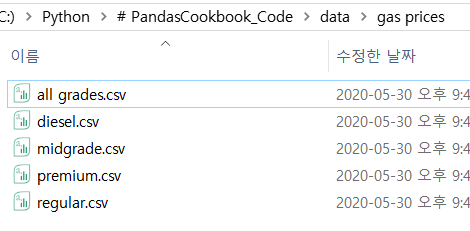

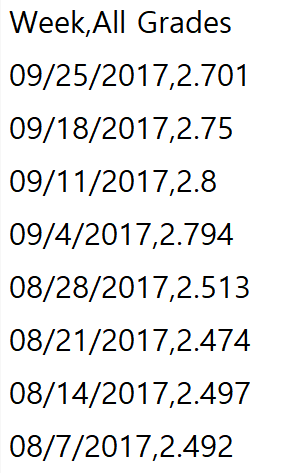

# 9.5 Connecting to SQL Databases

In [81]:
### [Tech] SQL을 사용하는 SQLITE db에 python package sqlalchemy와 
###       pandas SQLAlchemy 를 이용해서 접근한다. 
### [Goal] 관계형 DB의 schema를 이해하고 통합하여 분석한다. 
###        chinook에서 '장르별  음악 평균 길이'과 '고객별 소비금액'을 구해본다.
### [Data] SQLITE 의 chinook.db 

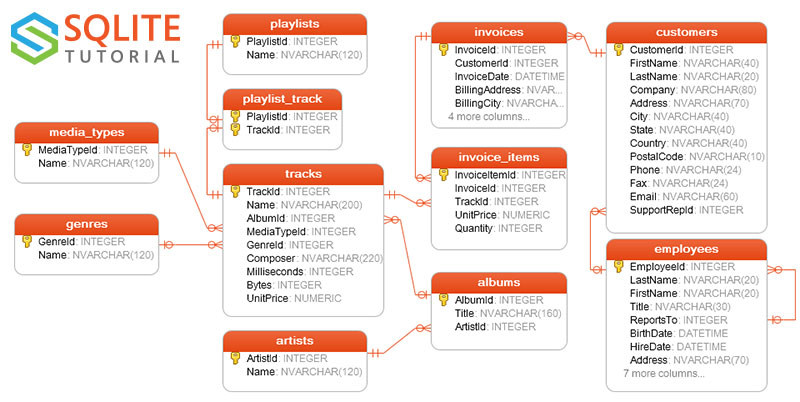

## >> How to do it...

In [82]:
# 9.5.1 
#db와 연결하기 위해서 sqlalchemy의 create_engine으로 connection을 맺는다. 
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/chinook.db')
type(engine)  # SQLAlchemy 

sqlalchemy.engine.base.Engine

In [83]:
# 9.5.2 read_sql_table로 table을 DataFrame으로 읽어 들인다. 
#     장르별 음악 평균 길이를 구하기 위해, tracks와 genre를 engien으로 부터 읽어 들인다.
tracks = pd.read_sql_table('tracks', engine)
print (tracks.shape)
tracks.head()

(3503, 9)


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [84]:
genres = pd.read_sql_table('genres', engine)
print (genres.shape)
genres.head()

(25, 2)


,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [85]:
# 9.5.3  genre와 tracks를 merge 한다.
#        GenreId를 정렬기준으로 한다. tracks에서는 GernreId와 Milliseconds(길이)만
#        필요하며, Genre 기준으로 정렬한다. 
#       
genre_track = genres.merge(tracks[['GenreId', 'Milliseconds']], 
                           on='GenreId', how='left') \
                     .drop('GenreId', axis='columns')  # GenreId는 제거
genre_track.head()

,Name,Milliseconds
0,Rock,343719
1,Rock,342562
2,Rock,230619
3,Rock,252051
4,Rock,375418


In [86]:
# 9.5.4 groupby를 통해 장르별(Name) 음악 평균 길이를 구한다. 
genre_time = genre_track.groupby('Name')['Milliseconds'].mean()  # Series

# 시:분:초로 표기 하고 짧은 순서부터 정렬한다.  
pd.to_timedelta(genre_time, unit='ms').dt.floor('s').sort_values()  

Name
Rock And Roll        00:02:14
Opera                00:02:54
Hip Hop/Rap          00:02:58
Easy Listening       00:03:09
Bossa Nova           00:03:39
R&B/Soul             00:03:40
World                00:03:44
Pop                  00:03:49
Latin                00:03:52
Alternative & Punk   00:03:54
Soundtrack           00:04:04
Reggae               00:04:07
Alternative          00:04:24
Blues                00:04:30
Rock                 00:04:43
Jazz                 00:04:51
Classical            00:04:53
Heavy Metal          00:04:57
Electronica/Dance    00:05:02
Metal                00:05:09
Comedy               00:26:25
TV Shows             00:35:45
Drama                00:42:55
Science Fiction      00:43:45
Sci Fi & Fantasy     00:48:31
Name: Milliseconds, dtype: timedelta64[ns]

In [87]:
# 9.5.5 고객별 소비 금액을 구해 본다. 
#       고객,  청구서,  구매항목을 columns를 통해 필요한 항목만 지정하여 읽어 들인다. 
cust = pd.read_sql_table('customers', engine, 
                         columns=['CustomerId', 'FirstName', 'LastName'])
invoice = pd.read_sql_table('invoices', engine, 
                            columns=['InvoiceId','CustomerId'])
ii = pd.read_sql_table('invoice_items', engine, 
                       columns=['InvoiceId', 'UnitPrice', 'Quantity'])

# 3개의 테이블을 merge로 연결한다. 
#     cust 고객 - invoice 청구서  (고객id CustomerId)
#               - ii  구매항목  (청구서id InvoiceId)
cust_inv = cust.merge(invoice, on='CustomerId') \
               .merge(ii, on='InvoiceId')

# 하나로 연결 된 DataFrame
cust_inv.head()

,CustomerId,FirstName,LastName,InvoiceId,UnitPrice,Quantity
0,1,Luís,Gonçalves,98,1.99,1
1,1,Luís,Gonçalves,98,1.99,1
2,1,Luís,Gonçalves,121,0.99,1
3,1,Luís,Gonçalves,121,0.99,1
4,1,Luís,Gonçalves,121,0.99,1


In [88]:
# 9.5.6 고객id별, 고객성명 별로  Qty * Price 의 Total 컬럼을 생성하고 합계를 구한다. 
#    .assign은 가상으로 (view) 컬럼을 생성

total =  cust_inv['Quantity'] * cust_inv['UnitPrice'] # 매출금액
cols = ['CustomerId', 'FirstName', 'LastName']      # 그룹화 기준 컬럼
# groupby 후 합산 정렬
cust_inv.assign(Total = total) \
        .groupby(cols)['Total'] \
        .sum() \
        .sort_values(ascending=False).head()

CustomerId  FirstName  LastName  
6           Helena     Holý          49.62
26          Richard    Cunningham    47.62
57          Luis       Rojas         46.62
46          Hugh       O'Reilly      45.62
45          Ladislav   Kovács        45.62
Name: Total, dtype: float64

## >> There's more... 9.5

In [89]:
# SQL문이 익숙하다면, 직접 SQL문으로 질의 할 수 있다.
pd.read_sql_query('select * from tracks limit 5', engine)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [90]:
#  9.5.2~4 과 동일한 결과인, 장르별 음악 평균 길이를 SQL문으로 구한다. 
sql_string1 = '''
select 
    Name, 
    time(avg(Milliseconds) / 1000, 'unixepoch') as avg_time
from (
        select 
            g.Name, 
            t.Milliseconds
        from 
            genres as g 
        join
            tracks as t
            on 
                g.genreid == t.genreid
    )
group by 
    Name
order by 
    avg_time
'''
pd.read_sql_query(sql_string1, engine)

,Name,avg_time
0,Rock And Roll,00:02:14
1,Opera,00:02:54
2,Hip Hop/Rap,00:02:58
3,Easy Listening,00:03:09
4,Bossa Nova,00:03:39
5,R&B/Soul,00:03:40
6,World,00:03:44
7,Pop,00:03:49
8,Latin,00:03:52
9,Alternative & Punk,00:03:54


In [91]:
#  9.5.5~6 와 동일한 결과인, 고객별 소비금액을 구한다. 
sql_string2 = '''
select 
      c.customerid, 
      c.FirstName, 
      c.LastName, 
      sum(ii.quantity *  ii.unitprice) as Total
from
     customers as c
join
     invoices as i
          on c.customerid = i.customerid
join
    invoice_items as ii
          on i.invoiceid = ii.invoiceid
group by
    c.customerid, c.FirstName, c.LastName
order by
    Total desc
'''
pd.read_sql_query(sql_string2, engine)

,CustomerId,FirstName,LastName,Total
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62
5,37,Fynn,Zimmermann,43.62
6,24,Frank,Ralston,43.62
7,28,Julia,Barnett,43.62
8,25,Victor,Stevens,42.62
9,7,Astrid,Gruber,42.62
